# IP Rights Strategies 

## Retrieve Dataset

In [131]:
setwd("C:/Users/MG53060/Documents/GitHub/EuropeEconomics")
Data <- readRDS(file = "./CleanData.rds")
Data$ip_owner <- as.factor(Data$ip_owner)

# load Libraries
library(VennDiagram)
library(stargazer)
library(dplyr)

## Overview of the IP Right Usage for the firms in the Data Sample

### IP Rights users VS Non Users

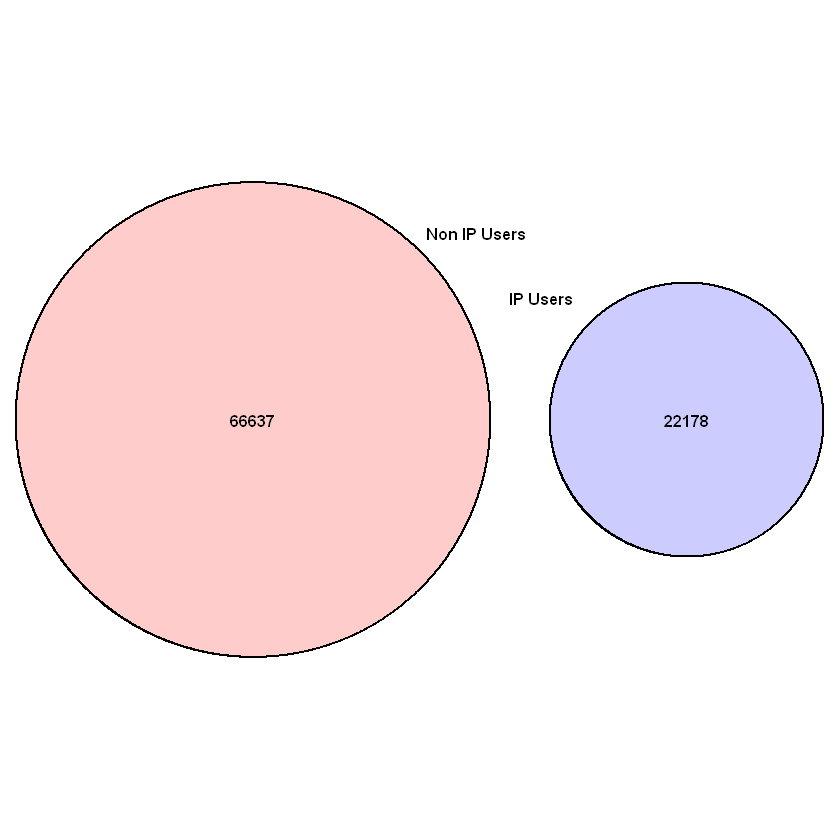

In [132]:
venn_data <- Data

IP_Right_usage <- draw.pairwise.venn(
    area1      = nrow(subset(venn_data, ip_owner == 1)),
    area2      = nrow(subset(venn_data, ip_owner == 0)),
    cross.area = 0,
    category   = c("IP Users", "Non IP Users"),   
    
    # Circles
    lwd = 2,
    fill = c("blue", "red"),
    alpha=c(0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.045),
    cat.fontfamily = "sans",
    #rotation = 1
)

### Distribution of the type of IP Right Combinations within the IP Right Users

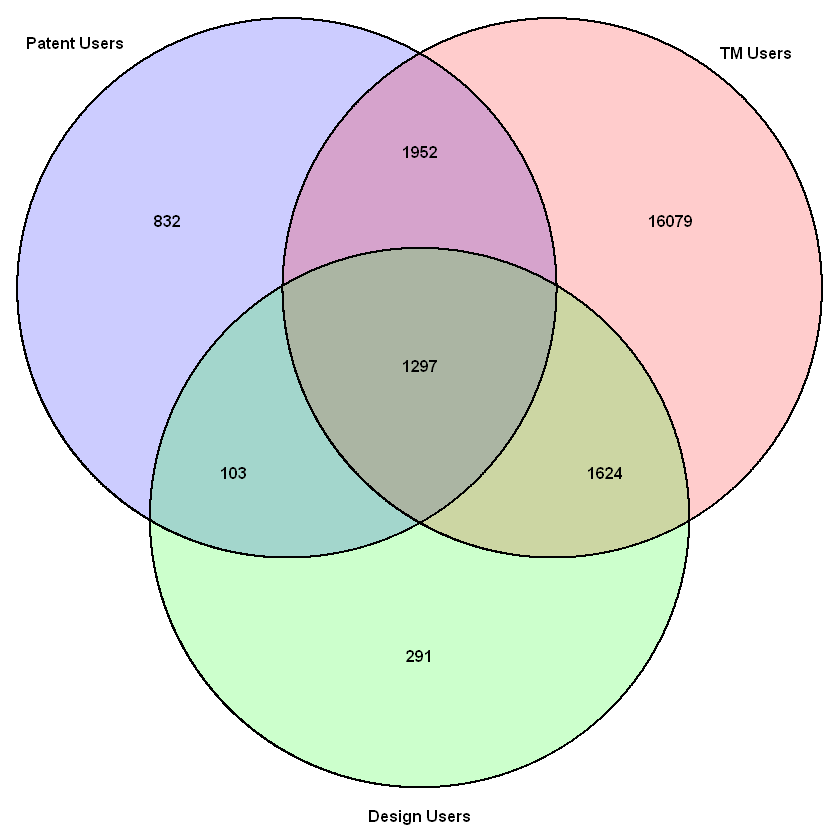

In [133]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")
venn_data <- Data

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("blue", "red", "green"),
    alpha=c(0.2,0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

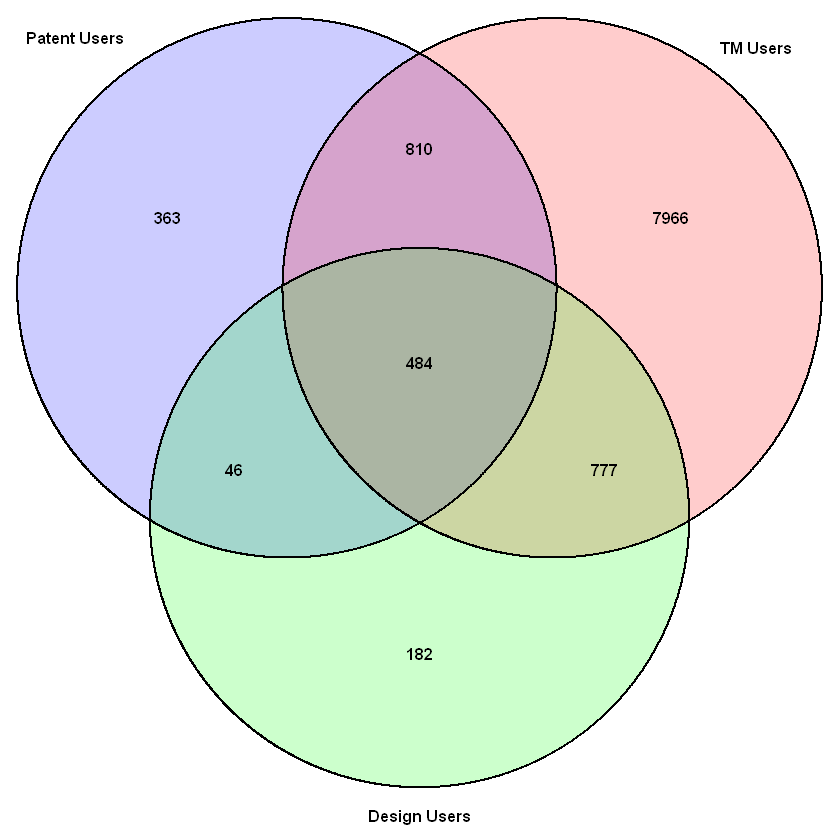

In [134]:
# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

venn_data <-  filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("blue", "red", "green"),
    alpha=c(0.2,0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

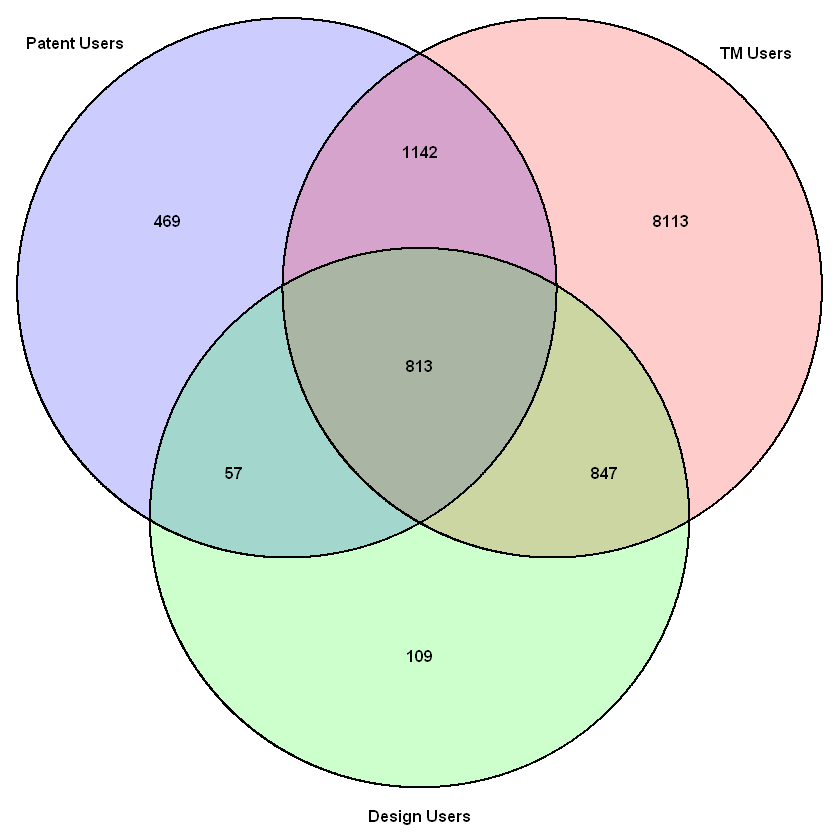

In [135]:
venn_data <-  filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("blue", "red", "green"),
    alpha=c(0.2,0.2,0.2),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

## Analysis Using Exclusive Indicators

#### Regression Model based on exclusive indicators

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>only</sub> + &Beta;<sub>2</sub> TM<sub>only</sub> + &Beta;<sub>3</sub> DES<sub>only</sub> + &Beta;<sub>4</sub> (PAT & TM)<sub>only</sub> + &Beta;<sub>5</sub> (PAT & DES)<sub>only</sub> + &Beta;<sub>6</sub> (TM & DES)<sub>only</sub> + &Beta;<sub>7</sub> (PAT & TM & DES)<sub>only</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & PAT_{Only} = TM_{Only} = DES_{Only} = (PAT \& TM)_{Only} =& (PAT \& DES)_{Only} =& (TM \& DES)_{Only} = (PAT \& TM \& DES)_{Only} = 0\\
        \beta_0 + \beta_1 & PAT_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_2 & TM_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_3 & DES_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_4 & (PAT \& TM)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_5 & (PAT \& DES)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_6 & (TM \& DES)_{Only} = 1 & &\text{, other dummies ZERO} \\
        \beta_0 + \beta_7 & (PAT \& TM \& DES)_{Only} = 1 & &\text{, other dummies ZERO}
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Ip Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Only Patents*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***Only Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>3</sub>:__ provides the difference in terms of mean value between firms which own ***Only Design*** and ***Non Ip Owners*** firms  
__&Beta;<sub>4</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>5</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Trademarks and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents, Trademarks and Designs*** and ***Non Ip Owners*** firms

In [136]:
Data_Lower <- filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_Upper <- filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg1_1 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des, data = Data)
reg1_2 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des + sector + country + sme , data = Data)
reg1_3 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des + sector + country + sme , data = Data_Lower)
reg1_4 = lm(log_rev_empl ~ patent_only + tm_only + des_only + pat_tm + pat_des + tm_des + pat_tm_des + sector + country + sme , data = Data_Upper)
reg_cov_labels <- c("Patent Only", "TM Only", "Design Only", "Patent - TM", "Patent - Design", "TM - Design", "Patent - TM - Design", "SME")
stargazer(reg1_4, reg1_3,reg1_2, reg1_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Exclusive Indicators Analysis", align=FALSE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Exclusive Indicators Analysis
                                              Dependent variable:                          
                     ----------------------------------------------------------------------
                                              log (Rev / Employee)                         
                      Leader + Strong  Modest + Moderate       Whole             Base      
                            (1)               (2)               (3)              (4)       
-------------------------------------------------------------------------------------------
Patent Only          0.180*** (0.042)  0.133*** (0.048)  0.163*** (0.032)  0.528*** (0.040)
TM Only              0.169*** (0.012)  0.284*** (0.012)  0.228*** (0.008)  0.383*** (0.010)
Design Only            0.134 (0.085)     0.105 (0.067)    0.115** (0.053)  0.249*** (0.068)
Patent - TM          0.178*** (0.028)  0.298*** (0.034)  0.233*** (0.022)  0.684*** (0.027)
Patent - Design        0.057 (0.118)    0.220* (0

## Analysis Using Non Exclusive Indicators

#### Regression Model based on non exclusive indicators using cross factors

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>owner</sub> + &Beta;<sub>2</sub> TM<sub>owner</sub> + &Beta;<sub>3</sub> DES<sub>owner</sub> + &Beta;<sub>4</sub> PAT<sub>Owner</sub> * TM<sub>owner</sub> + &Beta;<sub>5</sub> PAT<sub>Owner</sub> * DES<sub>owner</sub> + &Beta;<sub>6</sub> TM<sub>Owner</sub> * DES<sub>owner</sub> + &Beta;<sub>7</sub> PAT<sub>Owner</sub> * TM<sub>Owner</sub> * DES<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0  & \text{ - all dummies are ZERO}\\
        \beta_0 + \beta_1  & PAT_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Patents}  \\
        \beta_0 + \beta_2  & TM_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Trademarks}  \\
        \beta_0 + \beta_3  & DES_{Owner} = 1  \text{ , other dummies ZERO - firm owns only Design}  \\
        \beta_0 + \beta_1 + \beta_2 + \beta_4 &  (PAT)_{Owner} = 1, \, (TM)_{Owner} = 1, \, (PAT \& TM)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and TradeMarks} \\
        \beta_0 + \beta_1 + \beta_3 + \beta_5 &  (PAT)_{Owner} = 1, \, (DES)_{Owner} = 1, \, (PAT \& DES)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and Designs} \\
        \beta_0 + \beta_2 + \beta_3 + \beta_6 & (TM)_{Owner} = 1, \, (DES)_{Owner} = 1, \, (TM \& DES)_{Owner} = 1  \text{ , other dummies ZERO - firm owns Patents and Designs} \\
        \beta_0 + \beta_1 + \beta_2 + \beta_3 + \beta_4 + \beta_5 + \beta_6 + \beta_7 & \text{ - all dummies are ONE - firm owns all type of IP Rights}
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is composed by the firms not owning any kind of IP right defined as ***Non Ip Owners***   
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***Only Patents*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub>:__ provides the difference in terms of mean value between firms which own ***Only Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>3</sub>:__ provides the difference in terms of mean value between firms which own ***Only Design*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>2</sub> + &Beta;<sub>4</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Trademarks*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>3</sub> + &Beta;<sub>5</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>2</sub> + &Beta;<sub>3</sub> + &Beta;<sub>6</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Trademarks and Designs*** and ***Non Ip Owners*** firms  
__&Beta;<sub>1</sub> + &Beta;<sub>2</sub> + &Beta;<sub>3</sub> + &Beta;<sub>4</sub> + &Beta;<sub>5</sub> + &Beta;<sub>6</sub> + &Beta;<sub>7</sub>:__ provides the difference in terms of mean value between firms which own ***Only Bundles of Patents, Trademarks and Designs*** and ***Non Ip Owners*** firms

In [137]:
Data_Lower <- filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_Upper <- filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg2_1 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner, data = Data)
reg2_2 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner + sme + sector + country, data = Data)
reg2_3 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner + sme + sector + country, data = Data_Lower)
reg2_4 = lm(log_rev_empl ~ patent_owner + tm_owner + des_owner + patent_owner:tm_owner + patent_owner:des_owner + tm_owner:des_owner + patent_owner:tm_owner:des_owner + sme + sector + country, data = Data_Upper)
reg_cov_labels <- c("Patent Owner", "TM Owner", "Design Owner", "SME", "Patent - TM", "Patent - Design", "TM - Design", "Patent - TM - Design")
stargazer(reg2_4, reg2_3, reg2_2, reg2_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels,  omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Inclusive Indicators Analysis", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Inclusive Indicators Analysis
                                               Dependent variable:                          
                     -----------------------------------------------------------------------
                                              log (Rev / Employee)                          
                      Leader + Strong  Modest + Moderate       Whole             Base       
                            (1)               (2)               (3)               (4)       
--------------------------------------------------------------------------------------------
Patent Owner         0.180*** (0.042)  0.133*** (0.048)  0.163*** (0.032)  0.528*** (0.040) 
TM Owner             0.169*** (0.012)  0.284*** (0.012)  0.228*** (0.008)  0.383*** (0.010) 
Design Owner           0.134 (0.085)     0.105 (0.067)    0.115** (0.053)  0.249*** (0.068) 
SME                  -0.420*** (0.012) -0.420*** (0.014) -0.417*** (0.009)                  
Patent - TM          -0.170*** (0.050) 

### Reconstruction of the coefficients for ensuring equality of the two models

In [138]:
names_vec <- c("patent only", "trademark only", "design only", "patent & trademark", "patent & design", "trademark & design", "patent & trademark & design")
original_coeffs <- c(reg1_2$coefficient[2:8])
#names(original_coeff) <- names_vec
reconstructed_coeffs <- c( reg2_2$coefficient[2] 
                        , reg2_2$coefficient[3]
                        , reg2_2$coefficient[4]
                        , reg2_2$coefficient[2] + reg2_2$coefficient[3] + reg2_2$coefficient[115]
                        , reg2_2$coefficient[2] + reg2_2$coefficient[4] + reg2_2$coefficient[116]
                        , reg2_2$coefficient[3] + reg2_2$coefficient[4] + reg2_2$coefficient[117] 
                        , reg2_2$coefficient[2] + reg2_2$coefficient[3] + reg2_2$coefficient[4] + reg2_2$coefficient[115] + reg2_2$coefficient[116] + reg2_2$coefficient[117] + reg2_2$coefficient[118]  
                        )
#names(reconstructed_coeff) <- names_vec
table_comparison <- data.frame(original_coeffs, reconstructed_coeffs)
stargazer(table_comparison, type="text", summary=FALSE, digits=4)


            original_coeffs reconstructed_coeffs
------------------------------------------------
patent_only     0.1633             0.1633       
tm_only         0.2281             0.2281       
des_only        0.1152             0.1152       
pat_tm          0.2326             0.2326       
pat_des         0.1345             0.1345       
tm_des          0.2322             0.2322       
pat_tm_des      0.2015             0.2015       
------------------------------------------------


# Further Models 

### Focus on Patent Right Ownership

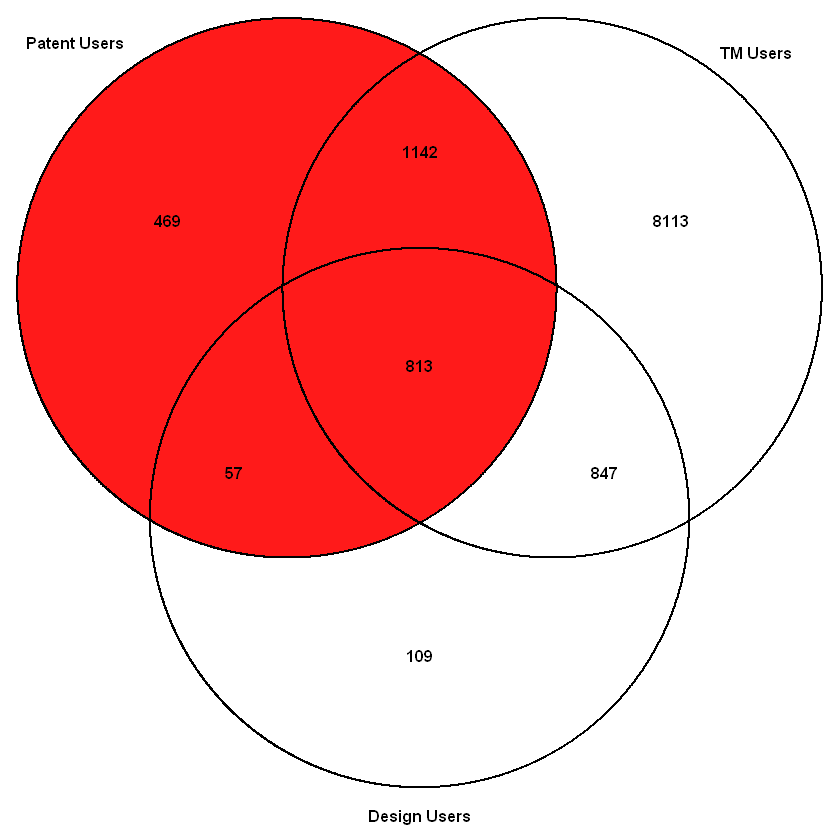

In [139]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("red", "white", "white"),
    alpha=c(0.9,0.,0.),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Patent Right Submodel 1

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & PAT_{Owner} = 0\\
        \beta_0 + \beta_1 & PAT_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Patent Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Patent*** and ***Non Patent Owners*** firms 

In [140]:
Data_Lower <- filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_Upper <- filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ patent_owner, data = Data)
reg6_2 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data)
reg6_3 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data_Lower)
reg6_4 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3, reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Patent Right Analysis: Base Class NON-IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Patent Right Analysis: Base Class NON-IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1           0.104*** (0.020)  0.155*** (0.024)  0.126*** (0.016)  0.593*** (0.018)
SME          -0.461*** (0.012) -0.486*** (0.013) -0.471*** (0.009)                 
Constant     5.245*** (0.258)  3.397*** (0.263)  5.230*** (0.262)  4.706*** (0.004)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes    

#### Patent Right Submodel 2

_Subsetting on the population owning IP Rights_

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> PAT<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & PAT_{Owner} = 0\\
        \beta_0 + \beta_1 & PAT_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for ***IP Owners not using Patents***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***IP users having at least one Patent*** and ***IP Owners not using Patents*** firms 

In [141]:
Data_IP <- filter(Data, ip_owner == 1)
Data_IP_Lower <- filter(Data_IP, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_IP_Upper <- filter(Data_IP, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ patent_owner, data = Data_IP)
reg6_2 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data_IP)
reg6_3 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data_IP_Lower)
reg6_4 = lm(log_rev_empl ~ patent_owner + sme + country + sector, data = Data_IP_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3,reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Patent Right Analysis: Base Class IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Patent Right Analysis: Base Class IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1            0.053** (0.021)    0.023 (0.024)    0.040** (0.016)  0.280*** (0.018)
SME          -0.342*** (0.016) -0.360*** (0.018) -0.349*** (0.012)                 
Constant     5.727*** (0.262)  3.489*** (0.468)  5.716*** (0.268)  5.019*** (0.008)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes        

### Focus on Trade Mark Right Ownership

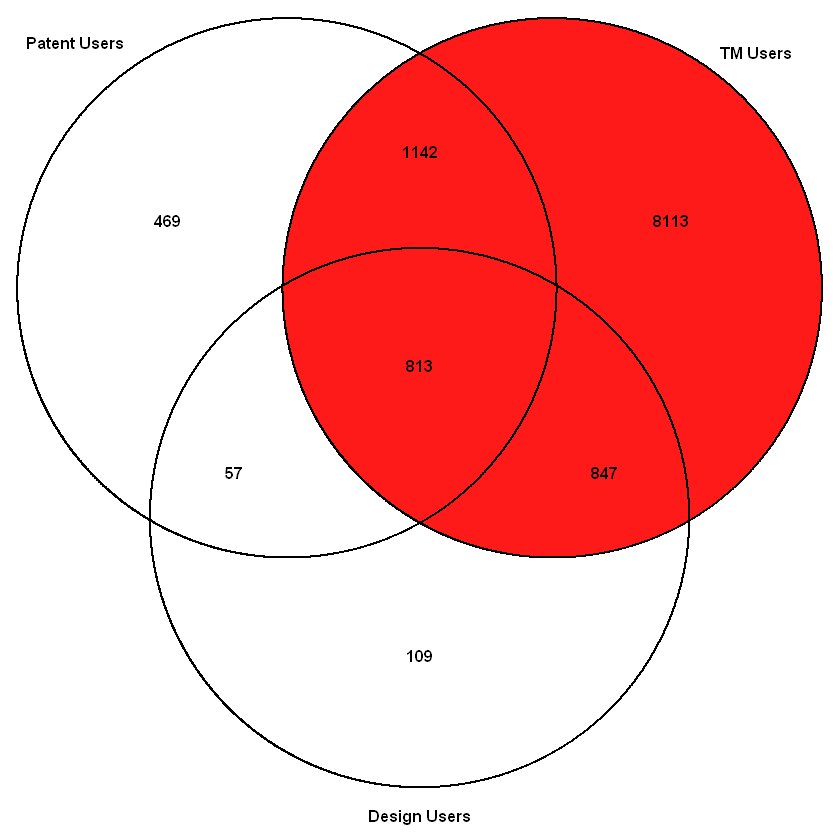

In [142]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("white", "red", "white"),
    alpha=c(0.,0.9,0.),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Trademark Right Submodel 1

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> TM<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & TM_{Owner} = 0\\
        \beta_0 + \beta_1 & TM_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Trade Mark Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Trademark*** and ***Non Trade Mark Owners*** firms 

In [143]:
Data_Lower <- filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_Upper <- filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ tm_owner, data = Data)
reg6_2 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data)
reg6_3 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data_Lower)
reg6_4 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3, reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Trademark Right Analysis: Base Class NON-IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Trademark Right Analysis: Base Class NON-IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1           0.166*** (0.011)  0.279*** (0.011)  0.223*** (0.008)  0.442*** (0.009)
SME          -0.423*** (0.012) -0.421*** (0.014) -0.420*** (0.009)                 
Constant     5.117*** (0.258)  3.321*** (0.261)  5.057*** (0.261)  4.630*** (0.004)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes 

#### Tradmark Right Submodel 2

_Subsetting on the population owning IP Rights_

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> TM<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & TM_{Owner} = 0\\
        \beta_0 + \beta_1 & TM_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for ***IP Owners not using Trademarks***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***IP Owners having at least one Trademark*** and ***IP Owners not using Trademarks*** firms 

In [144]:
Data_IP <- filter(Data, ip_owner == 1)
Data_IP_Lower <- filter(Data_IP, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_IP_Upper <- filter(Data_IP, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ tm_owner, data = Data_IP)
reg6_2 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data_IP)
reg6_3 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data_IP_Lower)
reg6_4 = lm(log_rev_empl ~ tm_owner + sme + country + sector, data = Data_IP_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3,reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Trademark Right Analysis: Base Class IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Trademark Right Analysis: Base Class IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1            -0.017 (0.032)   0.110*** (0.035)   0.043* (0.024)    -0.008 (0.031) 
SME          -0.348*** (0.015) -0.361*** (0.018) -0.353*** (0.012)                 
Constant     5.759*** (0.263)  3.391*** (0.469)  5.685*** (0.269)  5.079*** (0.030)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes     

### Focus on Design Right Ownership

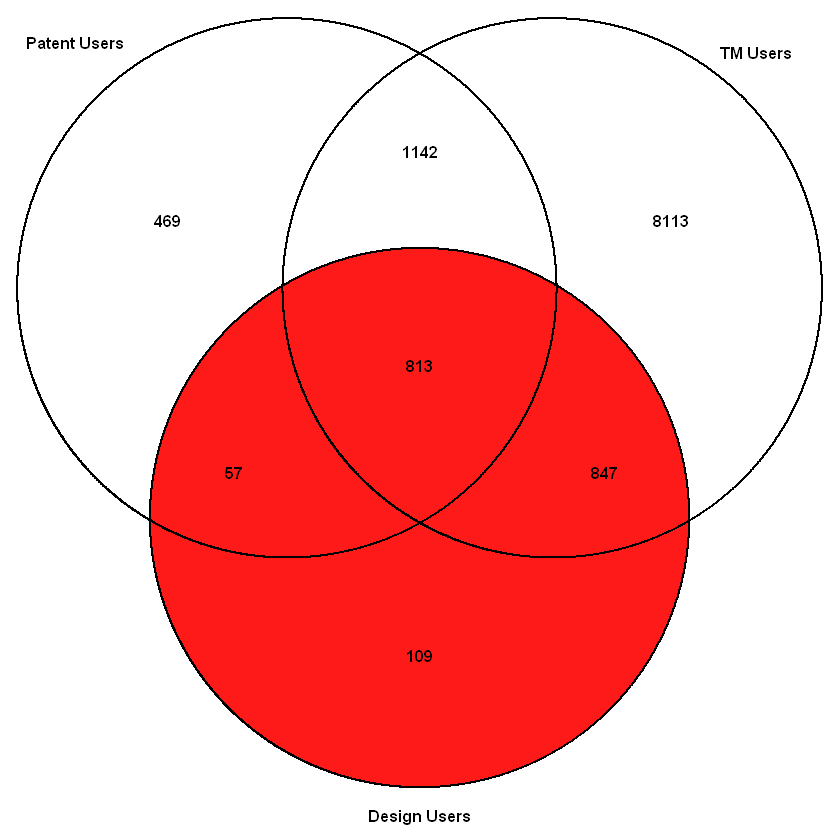

In [145]:
grid.newpage()

# Modify the VennDiagram Function using Trace for the present R Kernel session
# trace(draw.pairwise.venn, edit=TRUE)
# line To Be replaced: cell.labels <- areas
# Replacement Line: cell.labels <- paste0(areas," : ", round( 100*areas/sum(areas), 1), "%")

IP_Right_Type_usage <- draw.triple.venn(
    area1 = nrow(subset(venn_data, patent_owner == 1)), 
    area2 = nrow(subset(venn_data, tm_owner == 1)), 
    area3 = nrow(subset(venn_data, des_owner == 1)), 
    n12 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1)), 
    n23 = nrow(subset(venn_data, tm_owner == 1 & des_owner == 1)), 
    n13 = nrow(subset(venn_data, patent_owner == 1 & des_owner == 1)), 
    n123 = nrow(subset(venn_data, patent_owner == 1 & tm_owner == 1 & des_owner == 1)), 
    category = c("Patent Users", "TM Users", "Design Users"),     

    # Circles
    lwd = 2,
    fill = c("white", "white", "red"),
    alpha=c(0.,0.,0.9),
    
    # Numbers
    cex = .8,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set Names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.045, 0.035, 0.025),
    cat.fontfamily = "sans",
    rotation = 1,
    
    # Image Output
    filename = NULL,
    euler.d = TRUE,
    scaled = TRUE
)

#### Design Right Submodel 1

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> DES<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & DES_{Owner} = 0\\
        \beta_0 + \beta_1 & DES_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for the ***Non Design Owners***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***at least one Design*** and ***Non Design Owners*** firms 

In [146]:
Data_Lower <- filter(Data, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_Upper <- filter(Data, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ des_owner, data = Data)
reg6_2 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data)
reg6_3 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data_Lower)
reg6_4 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3, reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Design Right Analysis: Base Class NON-IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Design Right Analysis: Base Class NON-IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1           0.100*** (0.022)  0.137*** (0.025)  0.117*** (0.017)  0.529*** (0.021)
SME          -0.464*** (0.012) -0.487*** (0.013) -0.474*** (0.009)                 
Constant     5.240*** (0.258)  3.421*** (0.263)  5.225*** (0.262)  4.714*** (0.004)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes    

#### Design Right Submodel 2

_Subsetting on the population owning IP Rights_

__Log (Rev/Empl) = &Beta;<sub>0</sub> + &Beta;<sub>1</sub> DES<sub>owner</sub> + e__

$
\begin{equation*}
 E(Log(Rev/Empl)) =
    \begin{cases}
        \beta_0 & DES_{Owner} = 0\\
        \beta_0 + \beta_1 & DES_{Owner} = 1 
    \end{cases}
\end{equation*}
$

__&Beta;<sub>0</sub>:__ provides the mean value for the base category which is the mean value for ***IP Owners not using Designs***  
__&Beta;<sub>1</sub>:__ provides the difference in terms of mean value between firms which own ***IP Owners having at least one Design*** and ***IP Owners not using Designs*** firms 

In [147]:
Data_IP <- filter(Data, ip_owner == 1)
Data_IP_Lower <- filter(Data_IP, innovationLevel == 'modest' |  innovationLevel == 'moderate')
Data_IP_Upper <- filter(Data_IP, innovationLevel == 'strong' |  innovationLevel == 'leader')
reg6_1 = lm(log_rev_empl ~ des_owner, data = Data_IP)
reg6_2 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data_IP)
reg6_3 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data_IP_Lower)
reg6_4 = lm(log_rev_empl ~ des_owner + sme + country + sector, data = Data_IP_Upper)
reg_cov_labels <- c("B1", "SME")
stargazer(reg6_4, reg6_3,reg6_2, reg6_1, column.labels=c("Leader + Strong"," Modest + Moderate","Whole", "Base"), type = "text", style="all2", dep.var.labels = "$log (Rev / Employee)$", covariate.labels=reg_cov_labels, omit = c("country","sector"), omit.labels = c("Country?","Sector?"), title="Design Right Analysis: Base Class IP Owners", align=TRUE, single.row = TRUE, keep.stat = c("n","rsq","adj.rsq","res.dev","aic", "bic"))


Design Right Analysis: Base Class IP Owners
                                      Dependent variable:                          
             ----------------------------------------------------------------------
                                      log (Rev / Employee)                         
              Leader + Strong  Modest + Moderate       Whole             Base      
                    (1)               (2)               (3)              (4)       
-----------------------------------------------------------------------------------
B1            0.045** (0.021)   -0.004 (0.024)     0.022 (0.016)   0.202*** (0.020)
SME          -0.343*** (0.016) -0.362*** (0.018) -0.351*** (0.012)                 
Constant     5.728*** (0.262)  3.503*** (0.468)  5.721*** (0.268)  5.042*** (0.008)
-----------------------------------------------------------------------------------
Country?            Yes               Yes               Yes               No       
Sector?             Yes        